<a href="https://colab.research.google.com/github/DerekHsiehDev/Weather-Time-Series-with-TF-Keras-LSTM-and-NeuralProphet-/blob/main/tf_timeseries_sydney_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/weatherAUS.csv',index_col='date', parse_dates=True)

In [ ]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [ ]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
df = df[df['Location']=='Sydney']

# df['date'] = pd.to_datetime(df['date'], errors='coerce')
# plt.plot(df['date'], df['MaxTemp'])

In [ ]:
df = df.loc[:, df.columns.intersection(['date','MaxTemp'])]

In [ ]:

df.head()

,MaxTemp
date,
2008-02-01,22.4
2008-02-02,25.6
2008-02-03,24.5
2008-02-04,22.8
2008-02-05,25.7


In [ ]:

# df.plot(figsize=(12,6))
# df = df[df['date'].dt.is_month_start]
# df = df[df['date'].dt.is_month_start]
df.dropna(inplace=True)
df.set_index = 'date'
df.sort_index(inplace=True)
# df = df.asfreq(freq='D')
print(df.index)

df

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='date', length=3342, freq=None)


,MaxTemp
date,
2008-02-01,22.4
2008-02-02,25.6
2008-02-03,24.5
2008-02-04,22.8
2008-02-05,25.7
...,...
2017-06-21,19.6
2017-06-22,19.2
2017-06-23,17.7


In [ ]:

# df = df.drop(columns=['date'])


In [ ]:
df.shape

(3342, 1)

In [ ]:
train = df.head(1671)
test = df.tail(1671)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df.head(12)

,MaxTemp
date,
2008-02-01,22.4
2008-02-02,25.6
2008-02-03,24.5
2008-02-04,22.8
2008-02-05,25.7
2008-02-06,27.2
2008-02-07,26.3
2008-02-08,22.3
2008-02-09,20.8


In [ ]:
print(train)
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

            MaxTemp
date               
2008-02-01     22.4
2008-02-02     25.6
2008-02-03     24.5
2008-02-04     22.8
2008-02-05     25.7
...             ...
2012-09-25     19.1
2012-09-26     20.7
2012-09-27     22.8
2012-09-28     33.2
2012-09-29     22.8

[1671 rows x 1 columns]


In [ ]:
scaled_train[:10]

array([[0.35472973],
       [0.46283784],
       [0.42567568],
       [0.36824324],
       [0.46621622],
       [0.51689189],
       [0.48648649],
       [0.35135135],
       [0.30067568],
       [0.41554054]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
# define generator 
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y:: \n{y}')

Given the Array: 
[0.35472973 0.46283784 0.42567568 0.36824324 0.46621622 0.51689189
 0.48648649 0.35135135 0.30067568 0.41554054]
Predict this y:: 
[[0.40540541]]


In [ ]:
X.shape

n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1, activation='sigmoid'))
# model.add(Dense(128, input_shape=(22,), activation='relu'))

# model.add(Dense(64, input_shape=(22,), activation='relu'))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%%time
model.fit(generator, epochs=250, batch_size=128)

Epoch 1/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0128
Epoch 2/250
1659/1659 [==============================] - 10s 6ms/step - loss: 0.0117
Epoch 3/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0112
Epoch 4/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0108
Epoch 5/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0103
Epoch 6/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0101
Epoch 7/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0097
Epoch 8/250
1659/1659 [==============================] - 10s 6ms/step - loss: 0.0097
Epoch 9/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0096
Epoch 10/250
1659/1659 [==============================] - 9s 6ms/step - loss: 0.0095
Epoch 11/250
1659/1659 [==============================] - 10s 6ms/step - loss: 0.0094
Epoch 12/250
1659/1659 [==============================] - 9s 6ms/step -

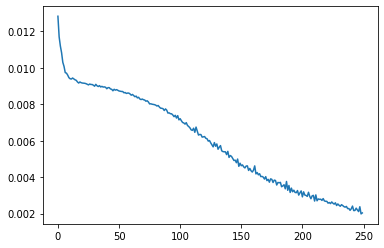

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)), loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-10:]

In [ ]:
last_train_batch = last_train_batch.reshape((1,  10, n_features))

In [ ]:
scaled_test[0]

array([0.35472973])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict_on_batch(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

In [ ]:
test_predictions

[array([0.18715471], dtype=float32),
 array([0.35074484], dtype=float32),
 array([0.44776854], dtype=float32),
 array([0.49592188], dtype=float32),
 array([0.41364545], dtype=float32),
 array([0.50052613], dtype=float32),
 array([0.46433246], dtype=float32),
 array([0.37060672], dtype=float32),
 array([0.41780013], dtype=float32),
 array([0.5656094], dtype=float32),
 array([0.528498], dtype=float32),
 array([0.40637836], dtype=float32),
 array([0.38229215], dtype=float32),
 array([0.4059592], dtype=float32),
 array([0.39743713], dtype=float32),
 array([0.33021498], dtype=float32),
 array([0.38204852], dtype=float32),
 array([0.39657184], dtype=float32),
 array([0.45496553], dtype=float32),
 array([0.5350004], dtype=float32),
 array([0.59790134], dtype=float32),
 array([0.6117226], dtype=float32),
 array([0.5801973], dtype=float32),
 array([0.5869366], dtype=float32),
 array([0.5211555], dtype=float32),
 array([0.4080436], dtype=float32),
 array([0.39930934], dtype=float32),
 array([0.5

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

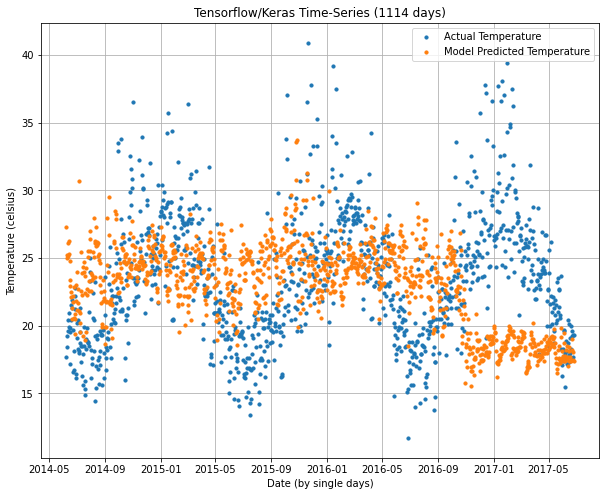

In [ ]:
# plot1 = test.tail(1114).plot(figsize=(12,6))
from matplotlib.pyplot import figure 

graphable_test = test.tail(1114).reset_index()

# figure(figsize=(10,8), dpi=80)

plt.scatter(graphable_test['date'], graphable_test['MaxTemp'], s=10)
plt.scatter(graphable_test['date'], graphable_test['Predictions'], s=10)



# plt.plot(test.tail(1114))
ax = plt.gca()
ax.set_axisbelow(True)
plt.grid()
plt.title("Tensorflow/Keras Time-Series (1114 days)")
plt.xlabel("Date (by single days)")
plt.ylabel("Temperature (celsius)")
plt.legend(['Actual Temperature', 'Model Predicted Temperature'])

fig1 = plt.gcf()
plt.draw()

fig1.set_size_inches(10,8)
# plt.draw()


from google.colab import files
fig1.savefig('tf-keras-test.png', dpi=250, bbox_inches='tight')
files.download("tf-keras-test.png") 





In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
mae = mean_absolute_error(test['MaxTemp'], test['Predictions'])
rmse = sqrt(mean_squared_error(test['MaxTemp'], test['Predictions']))
print('mean absolute error: ' + str(mae))
print('root mean squared error: ' + str(rmse))

mean absolute error: 4.4313301577959
root mean squared error: 5.619100891249019


In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('tf-timeseries-sydney-weather.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





Extracting templates from packages: 100%
[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/tf-timeseries-sydney-weather.ipynb to pdf
[NbConvertApp] Support files will be in tf-timeseries-sydney-weather_files/
[NbConvertApp] Making directory ./tf-timeseries-sydney-weather_files
[NbConvertApp] Making directory ./tf-timeseries-sydney-weather_files
[NbConvertApp] Writing 107201 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 137114 bytes to /content/drive/My Drive/tf-timeseries-sydney-weather.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'